# Part 1 - Word Tagging


Word Tagging {50 points}

Textbook Source: Chapter 2.5 Word Tagging

In [18]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('punkt_tab')
nltk.download('stopwords')

# read as single column
df = pd.read_csv('I-have-a-dream-speech.txt', sep='|', header=None, names=['speech'])

# Display the first few rows of the DataFrame
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Packag

,speech
0,"Five score years ago, a great American, in who..."
1,"But 100 years later, the Negro still is not fr..."
2,When the architects of our republic wrote the ...
3,It is obvious today that America has defaulted...
4,But we refuse to believe that the bank of just...


Using the provided I-have-a-dream.txt file, do the following: {20 points}

Parse the sentences of the speech.

Run some parts of speech tagging to determine the top-named entities in the speech.


In [30]:
s = nltk.sent_tokenize(df['speech'][0])
s1 = nltk.word_tokenize(s[1])
nltk.pos_tag(s1)

# Separate each of the sentences
sentences = nltk.sent_tokenize('speech')

#obtain the word tokens that can be POS tagged
tokenized_sentences = [nltk.word_tokenize(sentence)

for sentence in sentences]
tagged_sentences = [nltk.pos_tag(sentence) for
sentence in tokenized_sentences]


#Determining named entities in the tagged sentences
chunked_sentences = nltk.ne_chunk_sents(
tagged_sentences, binary=True)

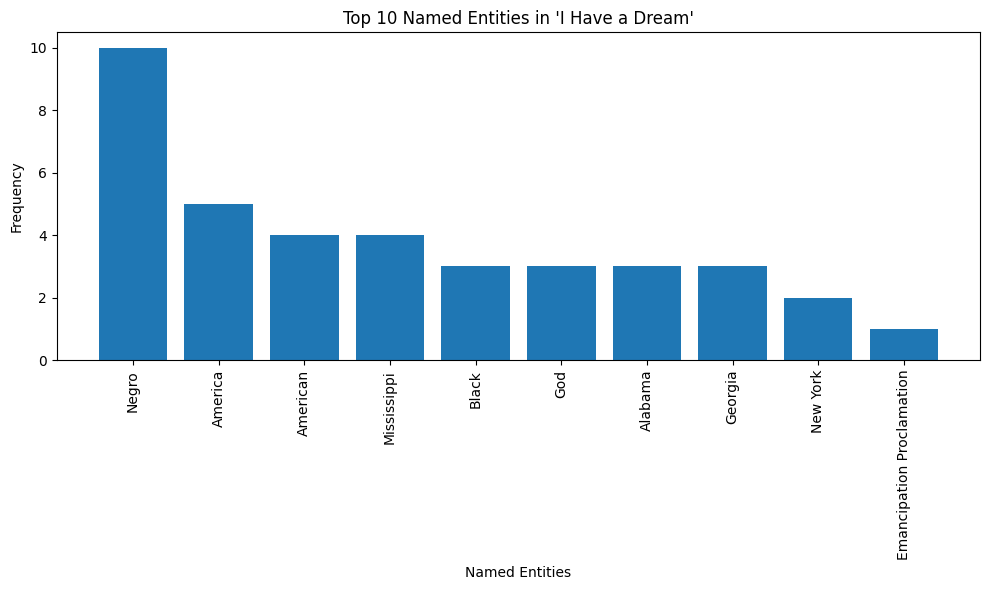

In [40]:
from collections import Counter

# Tokenizing sentences, extracting named entities
all_entities = []
for sentence in nltk.sent_tokenize(speech_text):
    for subtree in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sentence))):
        if hasattr(subtree, 'label'):
            all_entities.append((" ".join(token for token, _ in subtree.leaves()), subtree.label()))

# Count and display top 10 named entities
top10_entities = Counter(entity for entity, _ in all_entities).most_common(10)

# Plot
plt.figure(figsize=(10,6))
plt.bar(entities, frequencies)
plt.xlabel("Named Entities")
plt.ylabel("Frequency")
plt.title("Top 10 Named Entities in 'I Have a Dream'")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Part 2 - Tweets (Topic Modeling)

Tweets {50 points}

Textbook Source: Chapter 2.6 LDA in Action

Using the provided training and testing tweets files, perform LDA. {30 points}


Show some of the predictions made on the test data. Does it look accurate to you? Explain your rationale. {20 points}


In [51]:
#Import libraries
import pandas as pd

#read data
tweets = 'Train_QuantumTunnel_Tweets.csv'
tweets = pd.read_csv(tweets, encoding='utf-8')
#Import libraries
import pandas as pd
import re

#read data
tweets = 'Train_QuantumTunnel_Tweets.csv'
tweets = pd.read_csv(tweets, encoding='utf-8')


#This function lets us capture @-mentions, hashtags and URLs
def mentions_hashtags_urls(tw):
  mnt = re.compile(r'@\w+(?:[-'']\w+)*')
  hash = re.compile(r'#\w+(?:[-]\w+)*')
  urls = re.compile(r'http\S+')
  mention = ' '.join(mnt.findall(tw))
  hashtag = ' '.join(hash.findall(tw))
  link = ' '.join(urls.findall(tw))

  return mention, hashtag, link
  hashtag = '' ''.join(hash.findall(tw))
  link = '' ''.join(urls.findall(tw))

  return mention, hashtag, link

In [54]:
# the power of zip to populate three columns in our dataframe
tweets['Mentions'], tweets['Hashtags'],\
    tweets['URLs'] = zip(*tweets['Tweet'].\
      map(mentions_hashtags_urls))

In [56]:
# These three columns can help inform our topics. We will not use them in the rest of our analysis though
tweets[['Mentions', 'URLs', 'Hashtags']].tail(3)

,Mentions,URLs,Hashtags
321,@R_Trotta,,
322,,https://t.co/no4Usx6djV,#maths
323,,http://t.co/fW7pSgTWGj,


In [65]:
# We are ready to start the tokenisation of our corpus and
#for that we need to bring up some useful packages and functions.
#First we will be using the TweetTokenizer we encountered in Section 2.4.
#We can also decide to use a lemmatiser or a stemmer for the pre-processing part.
#In this case, we will use a stemmer which we hope will help with some differences in
#spelling for example between American and British English:

import nltk
from nltk.tokenize.casual import TweetTokenizer
porter = nltk.PorterStemmer()

# We are ready to start the tokenisation of our corpus and
#for that we need to bring up some useful packages and functions.
#First we will be using the TweetTokenizer we encountered in Section 2.4.
#We can also decide to use a lemmatiser or a stemmer for the pre-processing part.
#In this case, we will use a stemmer which we hope will help with some differences in
#spelling for example between American and British English:

import nltk
from nltk.tokenize.casual import TweetTokenizer
porter = nltk.PorterStemmer()
from nltk.corpus import stopwords
import string
stop_words = stopwords.words('english')
stop_words.extend(['i\'ve'])

In [86]:
#We will use this function to process our corpus.
def tw_preprocess(tw):
  tw = tw.lower()
  tw = re.sub(r'@\w+(?:-\w+)*', '', tw)
  tw = re.sub(r'\S*\d\S*', '', tw)
  tw = re.sub(r'http\S+', '', tw)
  tw = re.sub(r'[#\']', '', tw)
  tokens = TweetTokenizer().tokenize(tw)
  tokens = [t for t in tokens if t not in stop_words]
  tokens = [porter.stem(t) for t in tokens]
  tokens = [t for t in tokens if t not in string.punctuation]
  tokens = '' ''.join(tokens)
  return tokens

In [118]:
# Processing corpus
tweets['Processed_Tweet'] = tweets['Tweet'].\
  apply(tw_preprocess)

In [93]:
#Printing results
tweets ["Processed_Tweet"].tail()

,Processed_Tweet
319,perhappeopllevel
320,yayconnectautomateduroamuniversmichigangreat
321,truemeanwouldcinemaarrivlatealsopaidentitlfeel
322,reportcardfamoumathematicianmath
323,princetonguidlinearmodellogistregressr


In [123]:
# CountVectorizer creates a matrix of token counts from the words contained in our corpus.
from sklearn.feature_extraction.text import CountVectorizer

no_features = 1000
vectoriser = CountVectorizer(
    min_df=2,
    max_features=no_features)


In [142]:
# CountVectorizer creates a matrix of token counts from the words contained in our corpus.
from sklearn.feature_extraction.text import CountVectorizer

no_features = 1000
vectoriser = CountVectorizer(
    min_df=1,  # Changed min_df to 1 to include terms appearing in at least 1 document
    max_features=no_features
)

X = vectoriser.fit_transform(tweets['Processed_Tweet'])
# Get the feature names
feature_names = vectoriser.get_feature_names_out() # Corrected variable name to vectoriser




In [153]:
#Number of components in the language of Scikit-learn.
from sklearn.decomposition import LatentDirichletAllocation

In [158]:
#carry out a grid search over two parameters: The number of topics and the learning decay.
n_components = range(3,8)
search_params = {'n_components': n_components,
                 'learning_decay':[0.6,0.8, 1.0]}

In [168]:
#Our model needs to be instantiated before we are able to use it.
#This is true for other Scikit-learn models too.

lda = LatentDirichletAllocation( max_iter=10,learning_method="online", random_state=0, evaluate_every=-1, learning_offset=50.0)


from sklearn.model_selection import GridSearchCV
model = GridSearchCV(lda, param_grid=search_params, cv=15)
model.fit(X) # Assuming X is defined as in previous code snippets, representing the document-term matrix

best_lda_model = model.best_estimator_
best_model = model.best_estimator_
# Get the best parameters
best_params = model.best_params_
print("Best Parameters:")
print(best_params)

Best Parameters:
{'learning_decay': 0.8, 'n_components': 3}


In [170]:
print("Best Log Likelihood Score: ", model.best_score_)

Best Log Likelihood Score:  -422.0597809343453


In [184]:
lda_output=best_lda_model.transform(X)

topicnames = ['Topic' + str(i) for i in range(best_lda_model.n_components)]
tweets = pd.concat([tweets, pd.DataFrame(
np.round(lda_output, 2), columns=topicnames)], axis=1)

# Assign the lda_output to df_document_topic, representing the document-topic probabilities
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames)

dominant_topic = np.argmax(df_document_topic[topicnames].values, axis=1)
tweets['Dominant_Topic'] = dominant_topic

In [185]:
tweets[['Tweet', 'Dominant_Topic']].head(4)

,Tweet,Dominant_Topic
0,Oh... It is even worse... They are playing xma...,2
1,RStudio OS X Mavericks Issues Resolved http://...,2
2,A Hubble glitch has produced this stellar artw...,0
3,@kwbroman Good question. I've done separate-pa...,2


In [193]:
#We can take a look at the distribution of topics.
df_topic_distribution = (
    tweets['Dominant_Topic'].
    value_counts().reset_index( name="Num Documents"))
df_topic_distribution.columns = ['Topic Num', 'Num Documents']

print(df_topic_distribution)

   Topic Num  Num Documents
0          2            111
1          0            111
2          1            102


In [202]:
def topic_words(model, feature_names, n_words=10):
  for idx, topic in enumerate(model.components_):
    print('Topic'.format(idx))
    # Get the indices of the top n_words highest values in the topic array
    top_indices = topic.argsort()[:-n_words - 1:-1]
    # Filter the indices to ensure they are within the valid range of feature_names
    valid_indices = [i for i in top_indices if i < len(feature_names)]
    print(' '.join([feature_names[i] for i in valid_indices]))

topic_words(best_lda_model, feature_names, n_words=5) # Changed X to feature_names

Topic
reportcardfamoumathematicianmath ambitiexperidatascienctakebiasopensourcviewberkeley everusepiechart backfuturiigetrightwrong databottleneckoutperformenhancjpeg
Topic
to jenitennisonchallenguslookpost freshhellstarbuckplayxmacarolchipmunksimilarcri xkcd imspacesuitmarimnavigsixteenth
Topic
meteorexplodbangkokmondaymorn quantitfinancapplicrconstructtermstructurinterestrateuserpart earthfoundnasatelescop realliinterestpassiontalkuseopendatalevelknowledglocalarea momentinspirxkcd


In [204]:
#Begin testing

testtweets = 'Test_QuantumTunnel_Tweets.csv'
testtweets = pd.read_csv(testtweets, encoding='utf-8')

In [218]:
testtweets['Processed_Tweet'] = testtweets['Tweet'].apply(tw_preprocess)

In [219]:
#This function lets us score unseen documents with the trained model obtained.
def determine_topic(x, vec, model):
  mytext = [x]
  vec_transf = vec.transform(mytext)
  topic_prob_scores = model.transform(vec_transf)
  topic = np.argmax(topic_prob_scores)
  return topic

In [220]:
#Applying this function to the dataset
testtweets['Topic']=testtweets['Processed_Tweet'].\
apply(determine_topic, vec=vectoriser, model=best_lda_model)

testtweets[['Tweet', 'Topic']].tail(3)

,Tweet,Topic
160,knitr in a knutshell tutorial http://t.co/ixSQ...,0
161,"Up all night to get data, a music video parody...",0
162,"A survival guide to Data Science with R, from ...",0
